In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
import datetime as dt

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Import Data of housing Dataset

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

## Step 2: Data Preparation

In [6]:
data.shape

(1460, 81)

In [7]:
NA_col = data.isnull().sum()
# find out columns which have nulls
NA_col = NA_col[NA_col > 0]
# % of columns missing
print(round(100*NA_col[NA_col > 0]/len(data),2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [8]:
data.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'MoSold','Street', 'Utilities','PoolArea'], axis=1, inplace = True)

In [9]:
data.shape

(1460, 70)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [11]:
data[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']].head(10)

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,2003,2003,2008,2003.0
1,1976,1976,2007,1976.0
2,2001,2002,2008,2001.0
3,1915,1970,2006,1998.0
4,2000,2000,2008,2000.0
5,1993,1995,2009,1993.0
6,2004,2005,2007,2004.0
7,1973,1973,2009,1973.0
8,1931,1950,2008,1931.0
9,1939,1950,2008,1939.0


In [12]:
data['YearBuilt_Age'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']

# Dropping columns
data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)
data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head()

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0


In [13]:
integer_columns = data.select_dtypes(include=['int64']).columns
float_columns = data.select_dtypes(include=['float64']).columns
object_columns = data.select_dtypes(include=['object']).columns
print("Length of Int column {}".format(len(integer_columns)))
print("Length of float column {}".format(len(float_columns)))
print("Length of object column {}".format(len(object_columns)))


Length of Int column 32
Length of float column 2
Length of object column 36


In [14]:
data.GarageYrBlt_Age.fillna(-1,inplace=True)
data.MasVnrType.fillna('None',inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.mean(),inplace=True)
data.BsmtQual.fillna('TA',inplace=True)
data.BsmtCond.fillna('TA',inplace=True)
data.BsmtExposure.fillna('No',inplace=True)
data.BsmtFinType1.fillna('Unf',inplace=True)
data.BsmtFinType2.fillna('Unf',inplace=True)
data.GarageType.fillna('Attchd',inplace=True)
data.GarageFinish.fillna('Unf',inplace=True)
data.GarageQual.fillna('TA',inplace=True)
data.GarageCond.fillna('TA',inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   LotShape          1460 non-null   object 
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   LandSlope         1460 non-null   object 
 7   Neighborhood      1460 non-null   object 
 8   Condition1        1460 non-null   object 
 9   Condition2        1460 non-null   object 
 10  BldgType          1460 non-null   object 
 11  HouseStyle        1460 non-null   object 
 12  OverallQual       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  RoofStyle         1460 non-null   object 
 15  RoofMatl          1460 non-null   object 
 16  Exterior1st       1460 non-null   object 


In [16]:
num_col = list(data.dtypes[data.dtypes !='object'].index)
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

data = drop_outliers(data)

In [17]:
data.shape

(1445, 70)

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [18]:
def uni_cat(category_name,kind='NA',x_size=6,y_size=6):
    
    """
    kind = 'pow' : will be use to show Power law distribution plot
    x_size = "Figure xaxis size"
    y_size = "Figure yaxis size"
    """
    print(category_name)
    univariate_cat = pd.DataFrame(data[category_name].value_counts())
    univariate_cat.reset_index(level=0, inplace=True)
    univariate_cat.rename(columns = {'index':category_name,category_name:'frequency'},inplace =True)

    if kind == 'pow':
        # add rank column to below 
        univariate_cat['Rank'] = univariate_cat['frequency'].rank(ascending=False)
        print(univariate_cat)
        univariate_cat['frequency_log'] = np.log2(univariate_cat['frequency'])
        univariate_cat['Rank_log'] = np.log2(univariate_cat['Rank'])
        plt.plot(univariate_cat['Rank'],univariate_cat['frequency_log'])
        plt.title("Rank vs Frequency - Power Law Distribution - purpose")
        plt.xlabel("Log2(Rank)")
        plt.ylabel("Log2(Frequency)")
        plt.show()
    
    else:
        print(data[category_name].value_counts())

    plt.figure(figsize=(x_size,y_size))
    data[category_name].value_counts().plot.barh()
    category_val = category_name + " vs population"
    plt.title(category_val)
    plt.ylabel(category_name)
    plt.xlabel("Population")
    plt.show()
    plt.figure(figsize=(x_size,y_size))
    data[category_name].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    category_val = category_name + " vs population %"
    plt.title(category_val)
    plt.figure(figsize=(12,12))    
    plt.show()

MSZoning
RL         1137
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


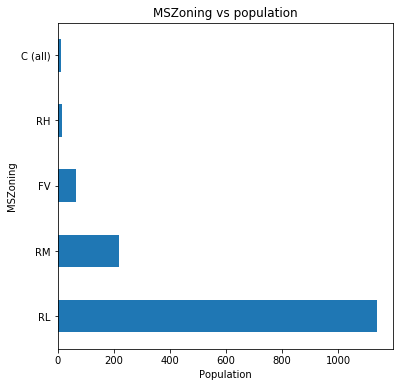

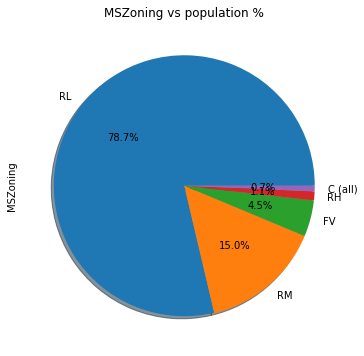

<Figure size 864x864 with 0 Axes>

LotShape
Reg    918
IR1    480
IR2     39
IR3      8
Name: LotShape, dtype: int64


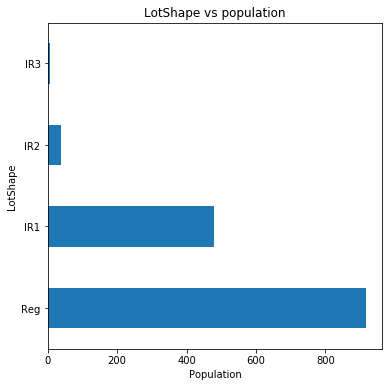

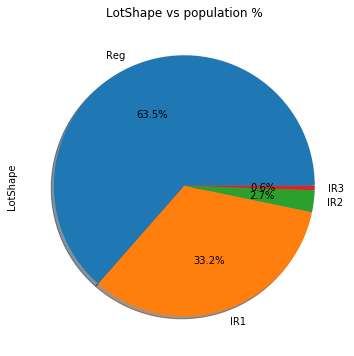

<Figure size 864x864 with 0 Axes>

LandContour
Lvl    1301
Bnk      62
HLS      49
Low      33
Name: LandContour, dtype: int64


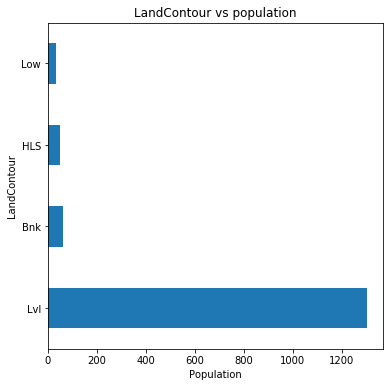

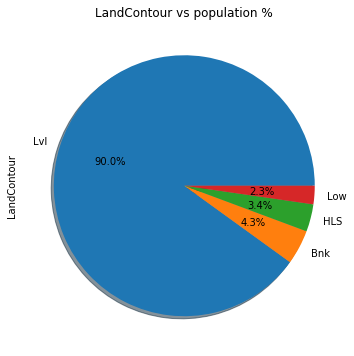

<Figure size 864x864 with 0 Axes>

LotConfig
Inside     1044
Corner      259
CulDSac      91
FR2          47
FR3           4
Name: LotConfig, dtype: int64


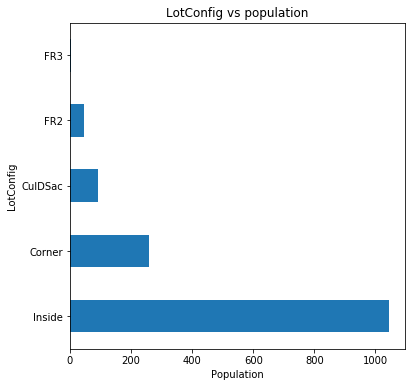

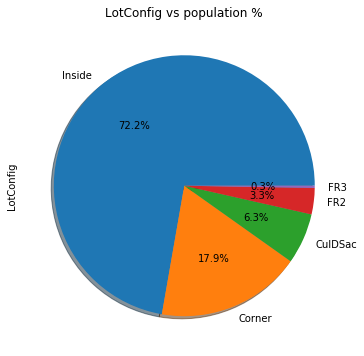

<Figure size 864x864 with 0 Axes>

LandSlope
Gtl    1371
Mod      65
Sev       9
Name: LandSlope, dtype: int64


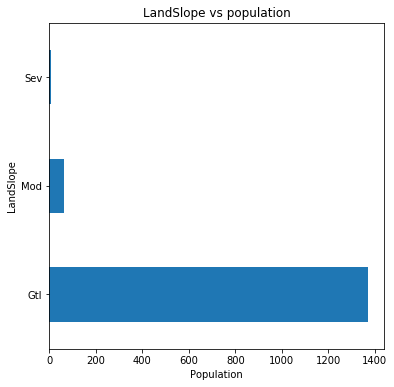

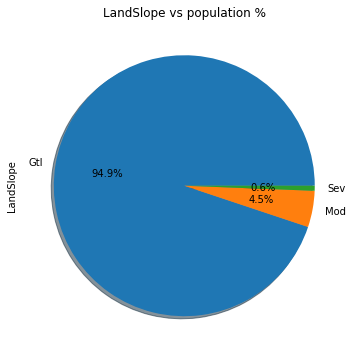

<Figure size 864x864 with 0 Axes>

Neighborhood
NAmes      222
CollgCr    149
OldTown    113
Edwards     98
Somerst     86
Gilbert     78
NridgHt     77
Sawyer      73
NWAmes      72
SawyerW     59
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      36
Timber      36
ClearCr     26
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


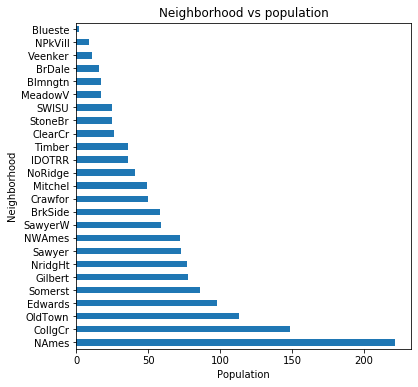

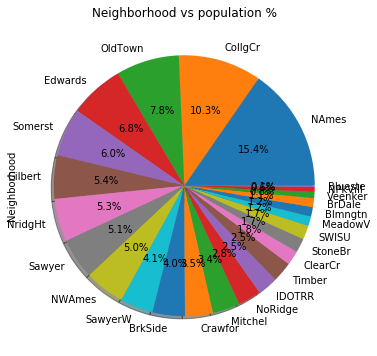

<Figure size 864x864 with 0 Axes>

Condition1
Norm      1249
Feedr       79
Artery      47
RRAn        25
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


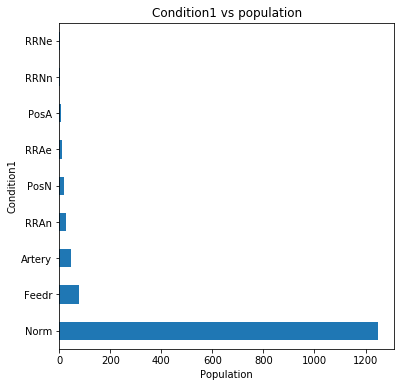

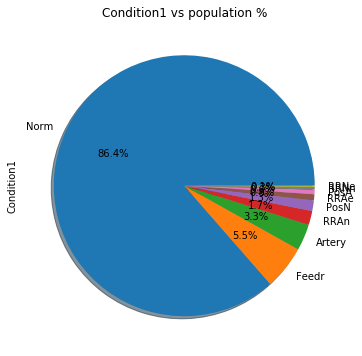

<Figure size 864x864 with 0 Axes>

Condition2
Norm      1431
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
Name: Condition2, dtype: int64


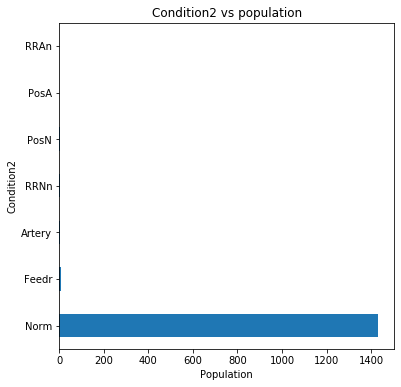

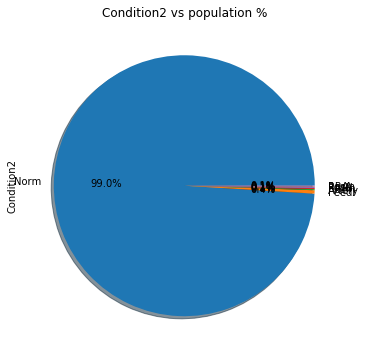

<Figure size 864x864 with 0 Axes>

BldgType
1Fam      1209
TwnhsE     114
Duplex      50
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64


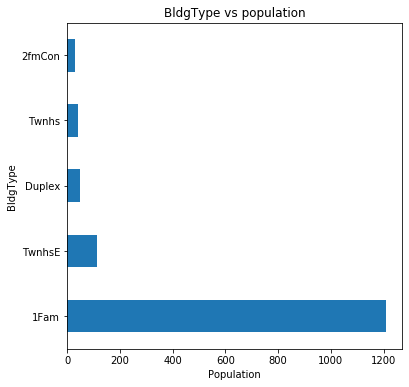

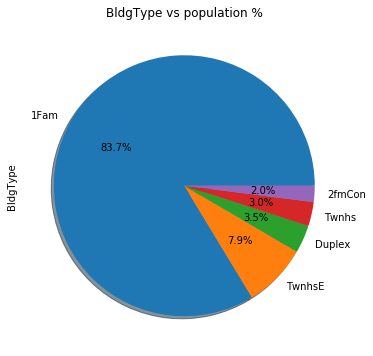

<Figure size 864x864 with 0 Axes>

HouseStyle
1Story    719
2Story    441
1.5Fin    150
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


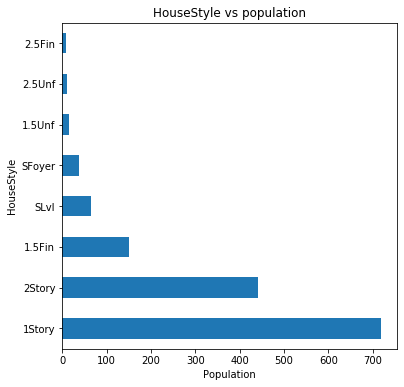

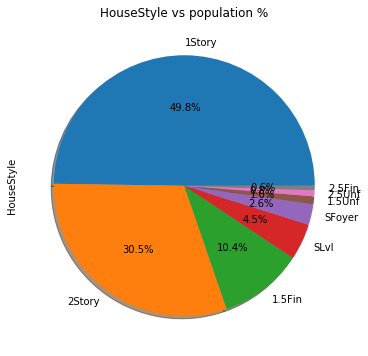

<Figure size 864x864 with 0 Axes>

RoofStyle
Gable      1132
Hip         281
Flat         13
Gambrel      11
Mansard       7
Shed          1
Name: RoofStyle, dtype: int64


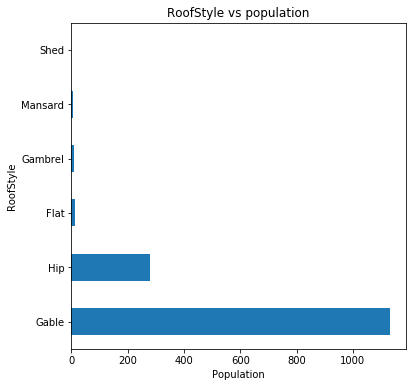

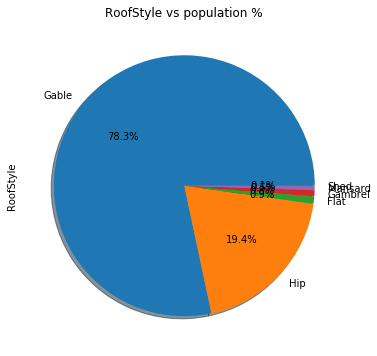

<Figure size 864x864 with 0 Axes>

RoofMatl
CompShg    1420
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


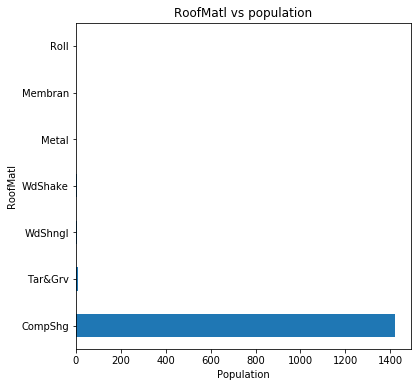

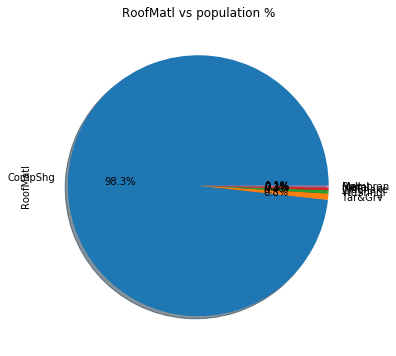

<Figure size 864x864 with 0 Axes>

Exterior1st
VinylSd    513
HdBoard    221
MetalSd    218
Wd Sdng    204
Plywood    103
CemntBd     60
BrkFace     49
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


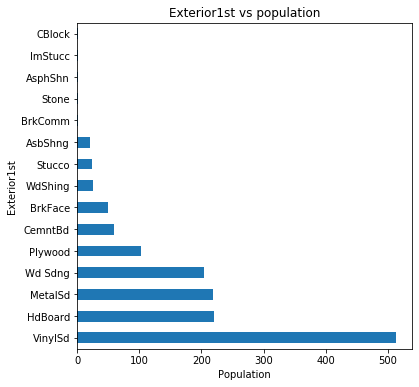

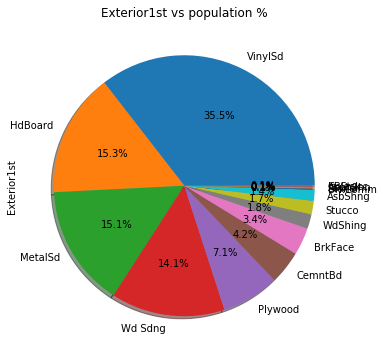

<Figure size 864x864 with 0 Axes>

Exterior2nd
VinylSd    503
MetalSd    212
HdBoard    205
Wd Sdng    196
Plywood    137
CmentBd     59
Wd Shng     37
Stucco      25
BrkFace     24
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


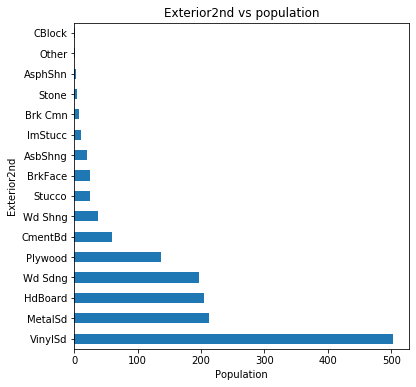

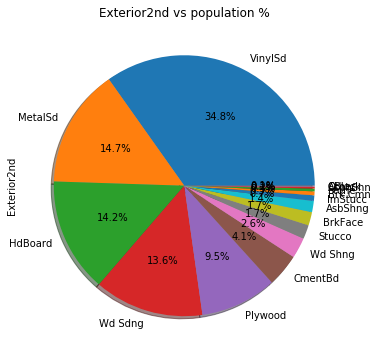

<Figure size 864x864 with 0 Axes>

MasVnrType
None       863
BrkFace    443
Stone      126
BrkCmn      13
Name: MasVnrType, dtype: int64


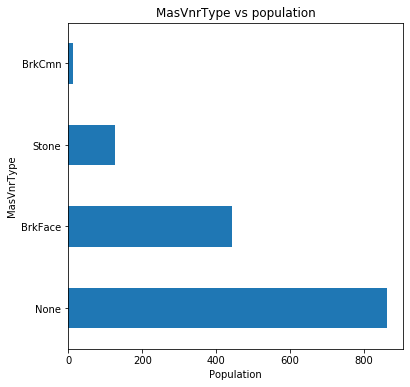

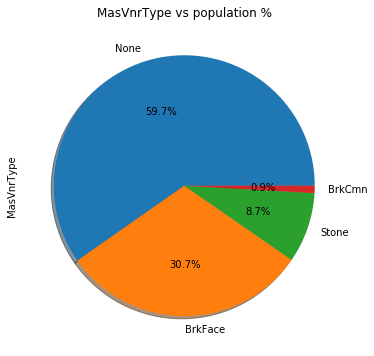

<Figure size 864x864 with 0 Axes>

ExterQual
TA    897
Gd    485
Ex     50
Fa     13
Name: ExterQual, dtype: int64


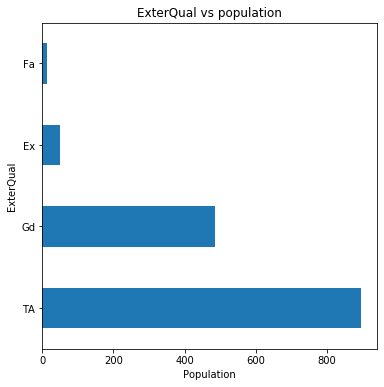

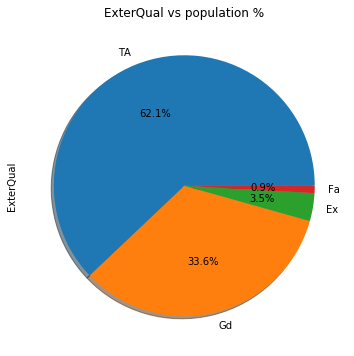

<Figure size 864x864 with 0 Axes>

ExterCond
TA    1271
Gd     143
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64


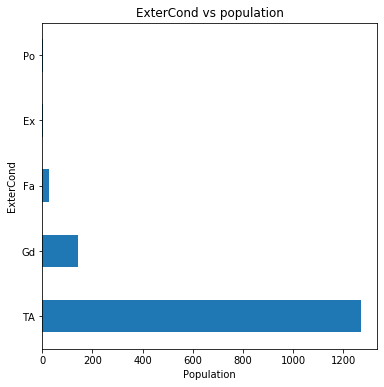

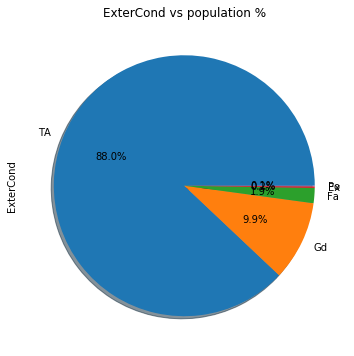

<Figure size 864x864 with 0 Axes>

Foundation
PConc     644
CBlock    624
BrkTil    146
Slab       23
Stone       5
Wood        3
Name: Foundation, dtype: int64


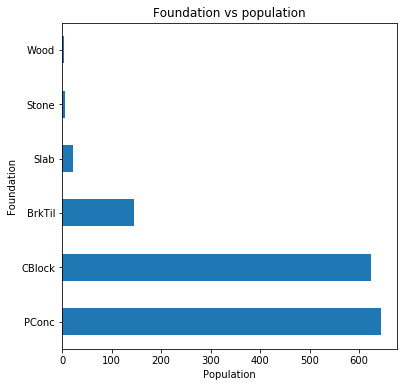

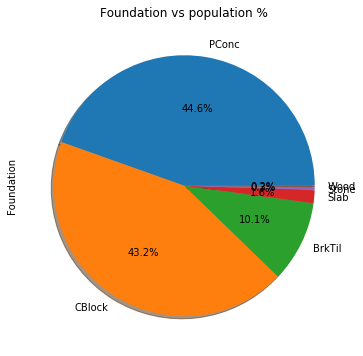

<Figure size 864x864 with 0 Axes>

BsmtQual
TA    680
Gd    610
Ex    120
Fa     35
Name: BsmtQual, dtype: int64


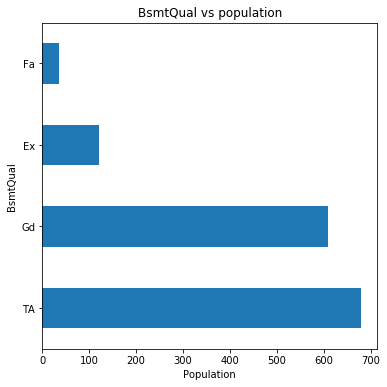

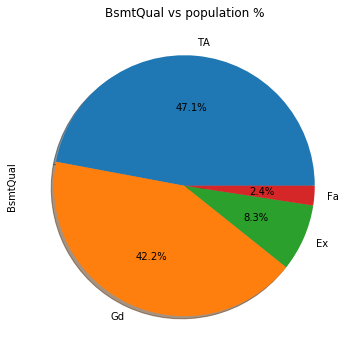

<Figure size 864x864 with 0 Axes>

BsmtCond
TA    1335
Gd      63
Fa      45
Po       2
Name: BsmtCond, dtype: int64


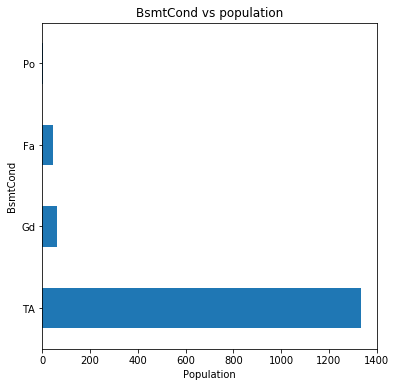

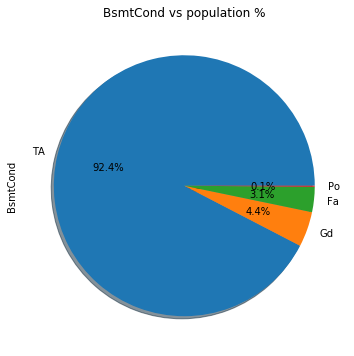

<Figure size 864x864 with 0 Axes>

BsmtExposure
No    985
Av    220
Gd    128
Mn    112
Name: BsmtExposure, dtype: int64


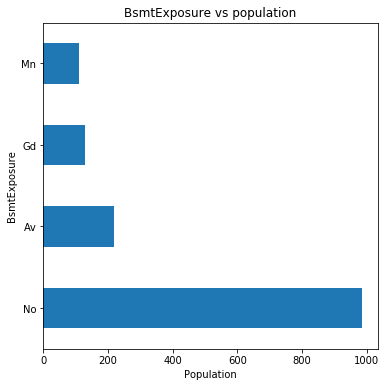

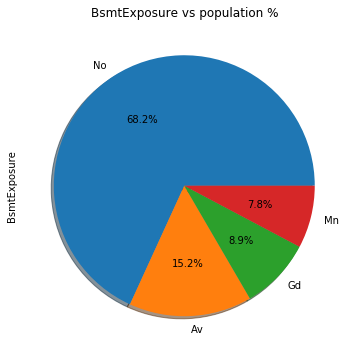

<Figure size 864x864 with 0 Axes>

BsmtFinType1
Unf    464
GLQ    412
ALQ    218
BLQ    145
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64


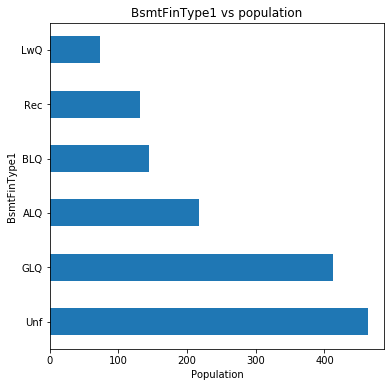

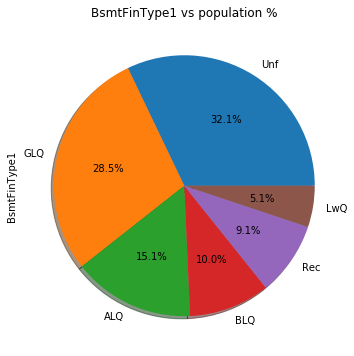

<Figure size 864x864 with 0 Axes>

BsmtFinType2
Unf    1284
Rec      51
LwQ      45
BLQ      32
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


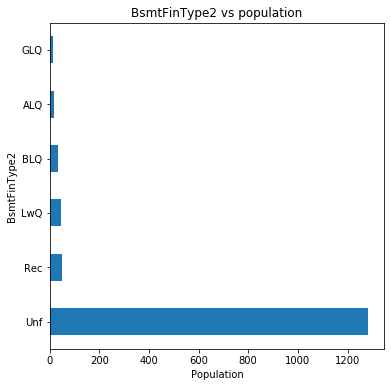

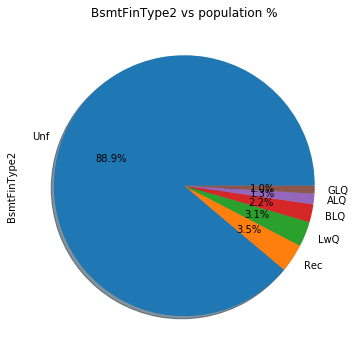

<Figure size 864x864 with 0 Axes>

Heating
GasA     1414
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


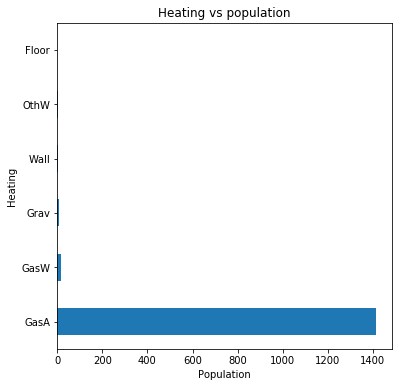

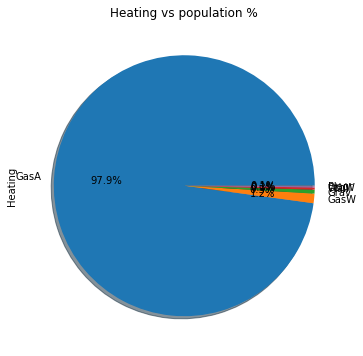

<Figure size 864x864 with 0 Axes>

HeatingQC
Ex    733
TA    423
Gd    240
Fa     48
Po      1
Name: HeatingQC, dtype: int64


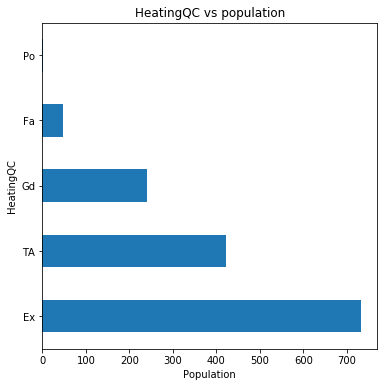

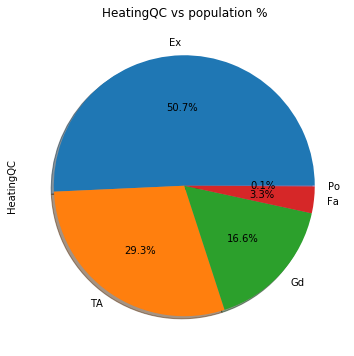

<Figure size 864x864 with 0 Axes>

CentralAir
Y    1351
N      94
Name: CentralAir, dtype: int64


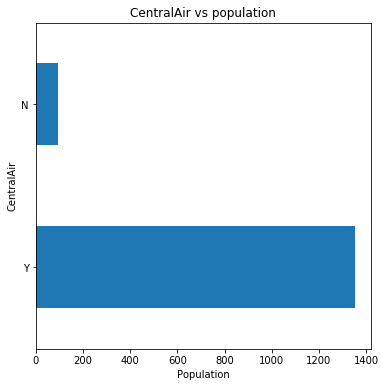

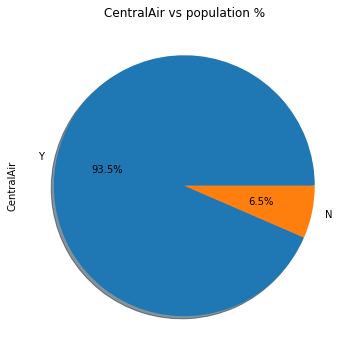

<Figure size 864x864 with 0 Axes>

Electrical
SBrkr    1319
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


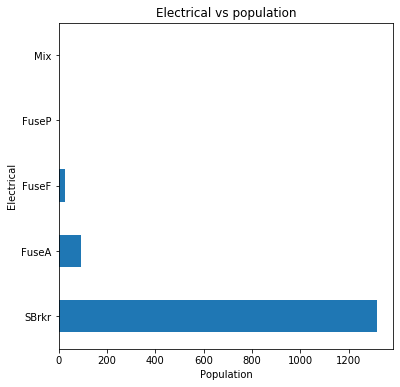

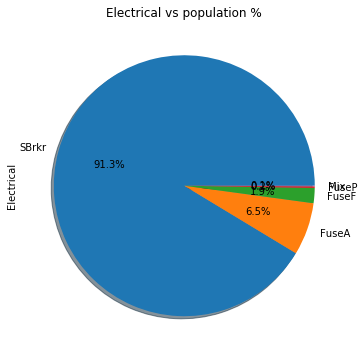

<Figure size 864x864 with 0 Axes>

KitchenQual
TA    727
Gd    581
Ex     99
Fa     38
Name: KitchenQual, dtype: int64


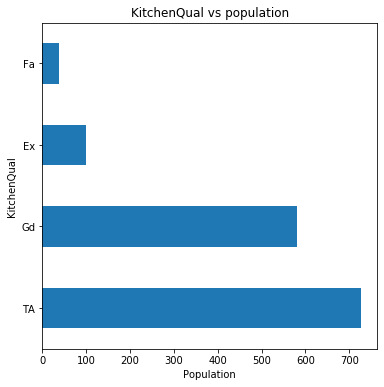

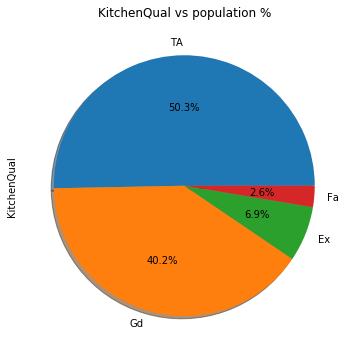

<Figure size 864x864 with 0 Axes>

Functional
Typ     1347
Min2      34
Min1      30
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64


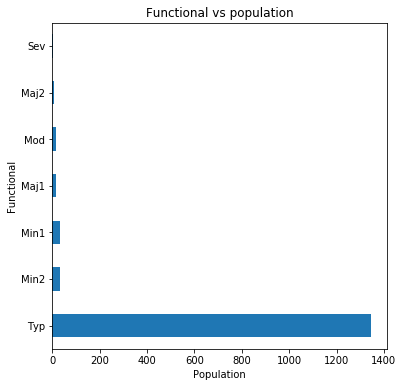

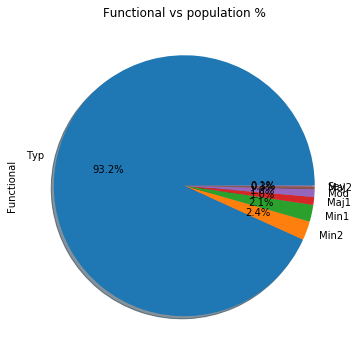

<Figure size 864x864 with 0 Axes>

GarageType
Attchd     939
Detchd     386
BuiltIn     87
Basment     19
CarPort      8
2Types       6
Name: GarageType, dtype: int64


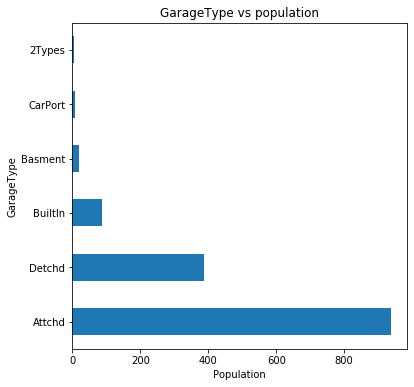

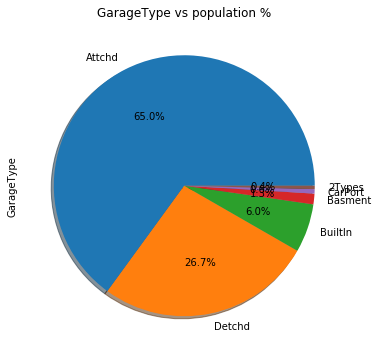

<Figure size 864x864 with 0 Axes>

GarageFinish
Unf    681
RFn    415
Fin    349
Name: GarageFinish, dtype: int64


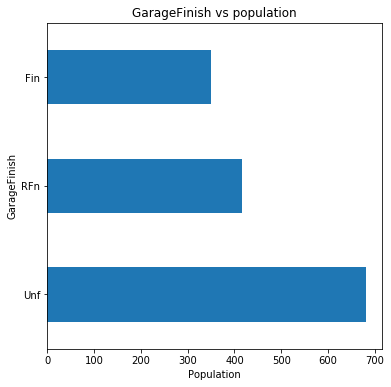

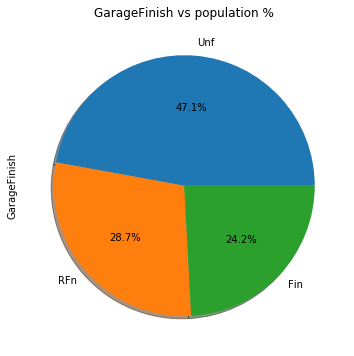

<Figure size 864x864 with 0 Axes>

GarageQual
TA    1377
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


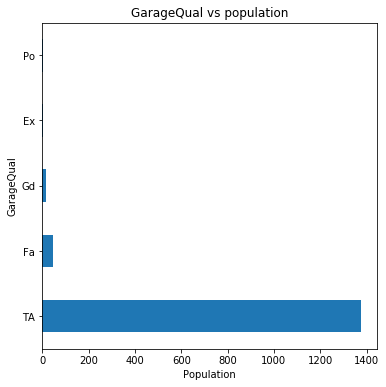

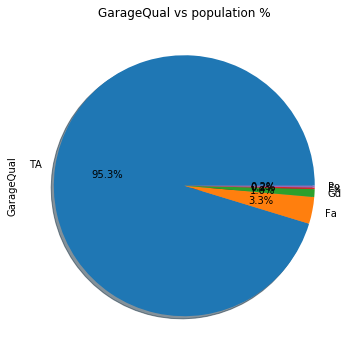

<Figure size 864x864 with 0 Axes>

GarageCond
TA    1392
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


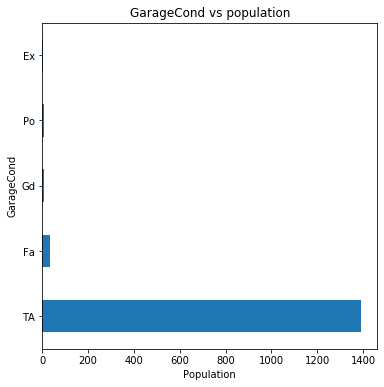

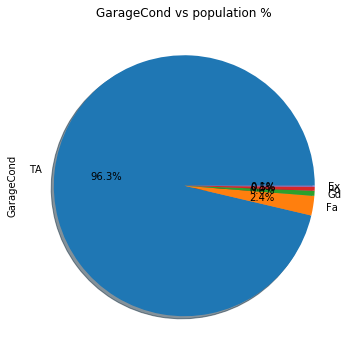

<Figure size 864x864 with 0 Axes>

PavedDrive
Y    1327
N      88
P      30
Name: PavedDrive, dtype: int64


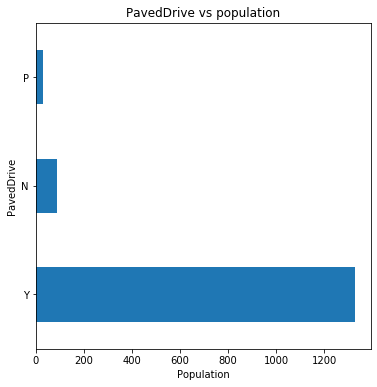

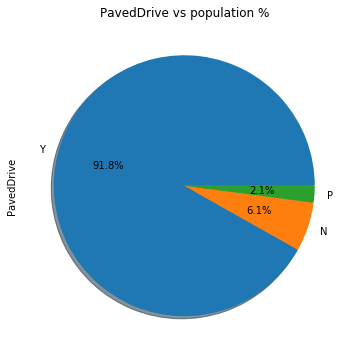

<Figure size 864x864 with 0 Axes>

SaleType
WD       1253
New       121
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


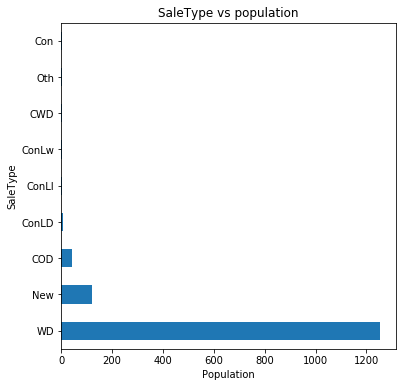

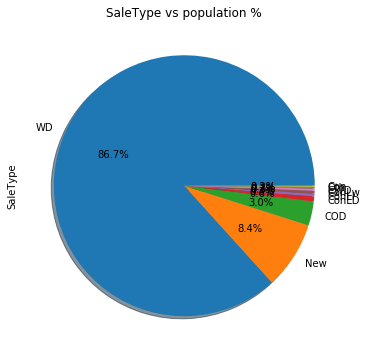

<Figure size 864x864 with 0 Axes>

SaleCondition
Normal     1185
Partial     124
Abnorml     101
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64


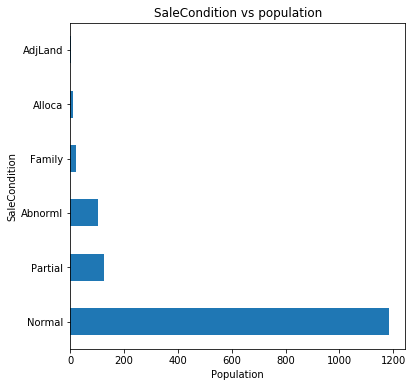

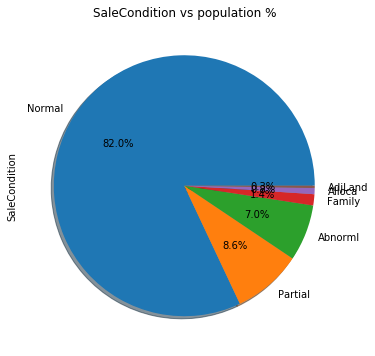

<Figure size 864x864 with 0 Axes>

In [19]:
for i in object_columns:
    uni_cat(i,6,6)

In [20]:
def uni_con(continous_variable,x_size=6,y_size=6,color_v="g",bin="auto"):
    """
    continous_variabe: Continous featured column name
    bins : no of bins
    x_size : Figure xaxis size
    y_size : Figure yaxis size
    color_v : color parameter to the plot
    
    Assumption : Subject to business approval we will be removing values greater than greater than Q3 + 1.5 *IQR  hence Calculating Third and First Quartile values
    """
    
    print("\n Variable : {} \n\nSummary : \n\n{}\n\n".format(continous_variable,data[continous_variable].describe([.25, .5, .75,.95]))) 
    Q3, Q1 = np.percentile(data[continous_variable], [75,0])
    IQR = Q3 - Q1 
    print("\n Q3  Percentile Value : {} and Q1 Value : {} and IQR Value : {}\n".format(Q3,Q1,IQR))
    #print("\n If values are are greater than Q3 + 1.5 *IQR : {} we will consider them as outliers ".format(Q3 + 1.5 *IQR))
    plt.figure(figsize=(x_size,y_size))
    plt.boxplot(data[continous_variable])
    plt.title(continous_variable)
    plt.xlabel(continous_variable)
    plt.ylabel("Quartile Range min to max")
    plt.show()
    sns.distplot(data[continous_variable],kde=True,color=color_v,bins=bin)
    plt.title(continous_variable)
    plt.xlabel(continous_variable)
    plt.show()
    
    


 Variable : MasVnrArea 

Summary : 

count    1445.000000
mean      103.133206
std       179.737877
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
95%       450.800000
max      1600.000000
Name: MasVnrArea, dtype: float64



 Q3  Percentile Value : 164.0 and Q1 Value : 0.0 and IQR Value : 164.0



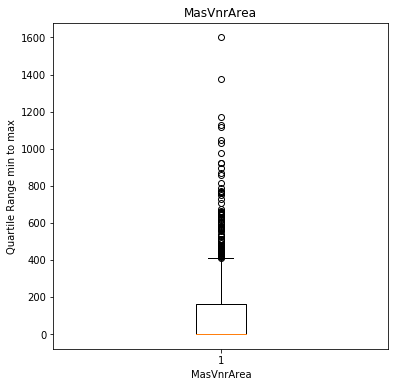

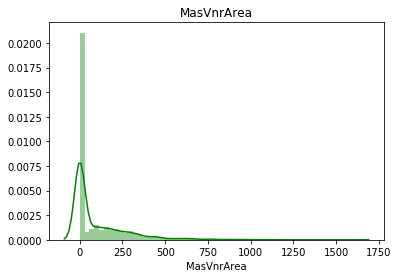


 Variable : GarageYrBlt_Age 

Summary : 

count    1445.000000
mean       29.680969
std        25.147899
min        -1.000000
25%         7.000000
50%        25.000000
75%        48.000000
95%        80.000000
max       110.000000
Name: GarageYrBlt_Age, dtype: float64



 Q3  Percentile Value : 48.0 and Q1 Value : -1.0 and IQR Value : 49.0



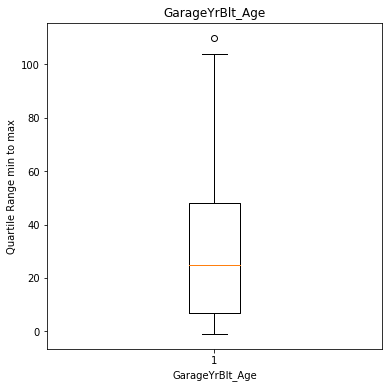

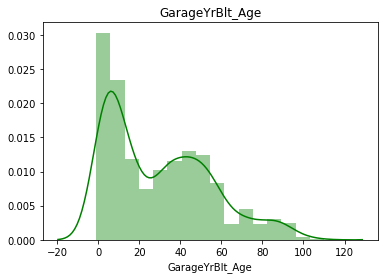

In [21]:
for i in float_columns:
    uni_con(i)

The Categorical Variables are ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MiscVal', 'YrSold_Age']
MSSubClass
20     530
60     297
50     142
120     87
30      69
160     63
70      59
80      58
90      50
190     28
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


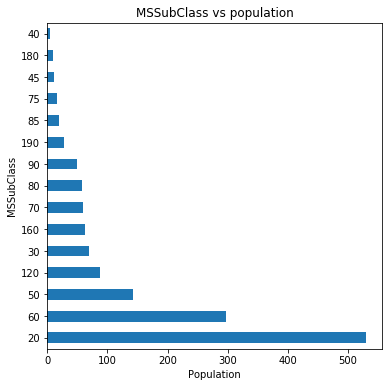

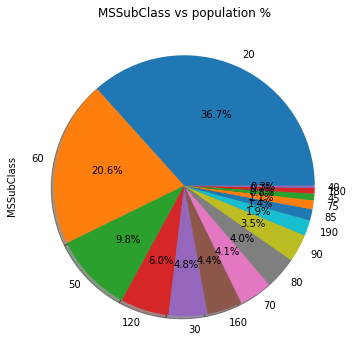

<Figure size 864x864 with 0 Axes>

OverallQual
5     392
6     372
7     314
8     167
4     115
9      43
3      20
10     17
2       3
1       2
Name: OverallQual, dtype: int64


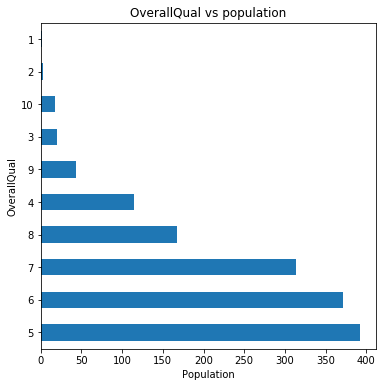

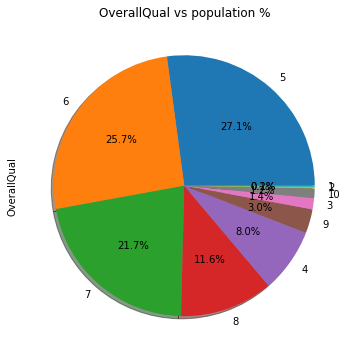

<Figure size 864x864 with 0 Axes>

OverallCond
5    812
6    251
7    202
8     71
4     57
3     25
9     21
2      5
1      1
Name: OverallCond, dtype: int64


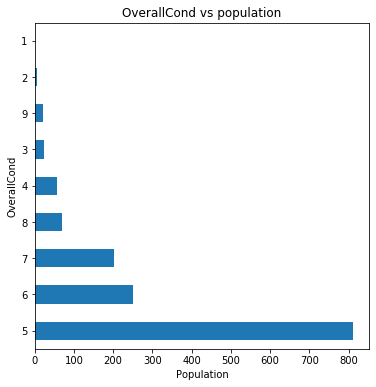

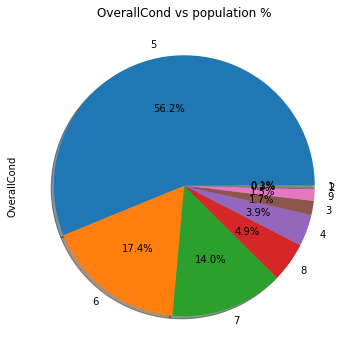

<Figure size 864x864 with 0 Axes>

BsmtFullBath
0    849
1    584
2     12
Name: BsmtFullBath, dtype: int64


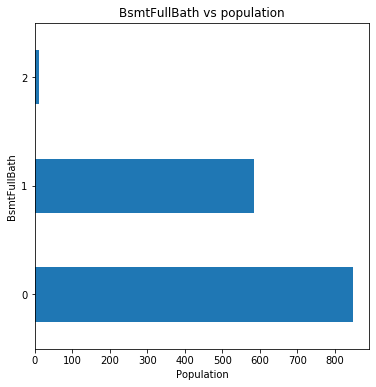

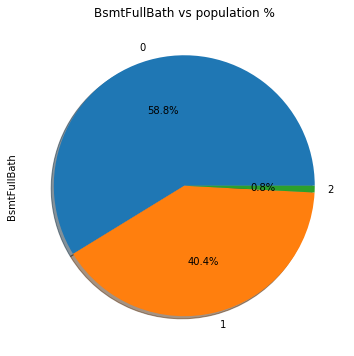

<Figure size 864x864 with 0 Axes>

BsmtHalfBath
0    1364
1      79
2       2
Name: BsmtHalfBath, dtype: int64


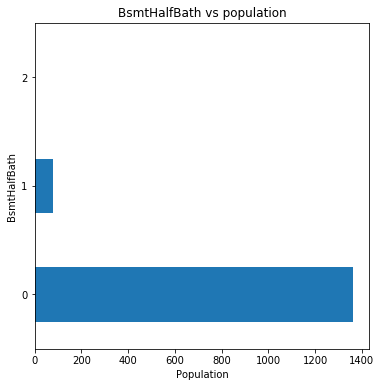

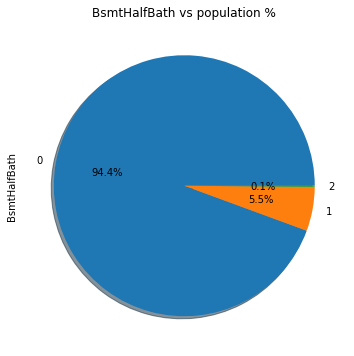

<Figure size 864x864 with 0 Axes>

FullBath
2    758
1    647
3     31
0      9
Name: FullBath, dtype: int64


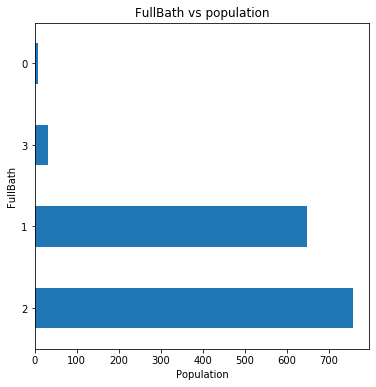

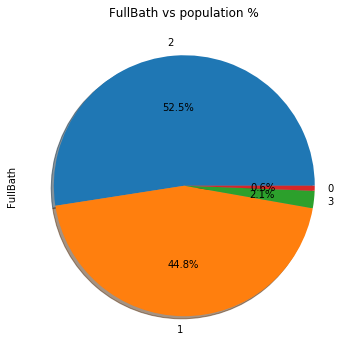

<Figure size 864x864 with 0 Axes>

HalfBath
0    901
1    533
2     11
Name: HalfBath, dtype: int64


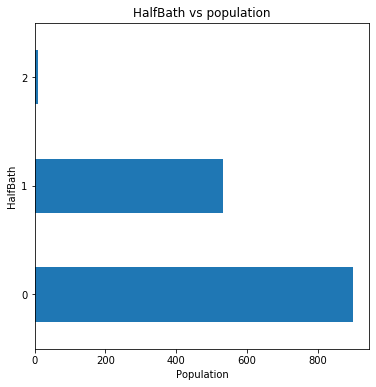

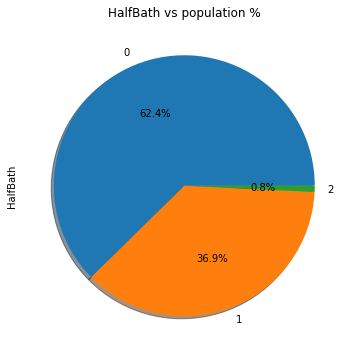

<Figure size 864x864 with 0 Axes>

BedroomAbvGr
3    796
2    355
4    210
1     50
5     20
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


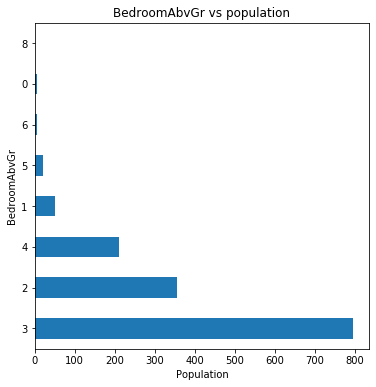

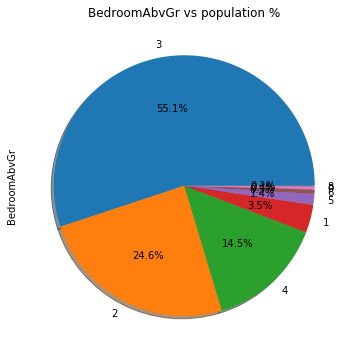

<Figure size 864x864 with 0 Axes>

KitchenAbvGr
1    1379
2      63
3       2
0       1
Name: KitchenAbvGr, dtype: int64


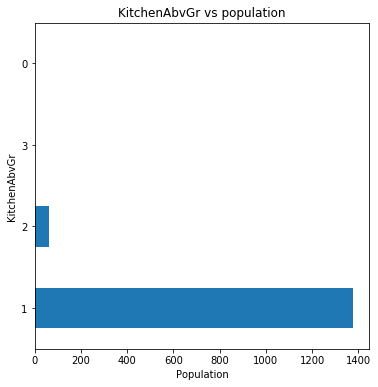

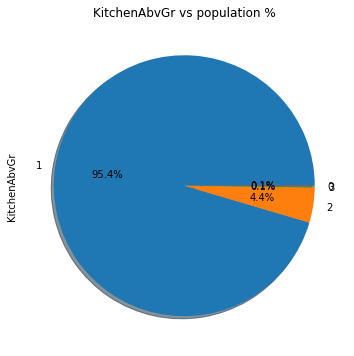

<Figure size 864x864 with 0 Axes>

TotRmsAbvGrd
6     399
7     326
5     271
8     186
4      97
9      74
10     47
11     18
3      17
12      8
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


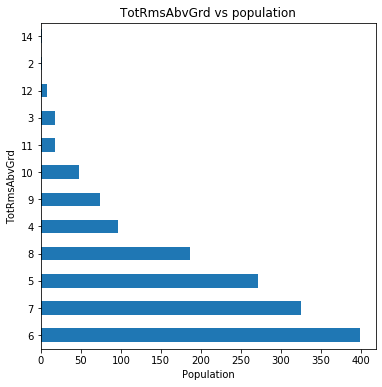

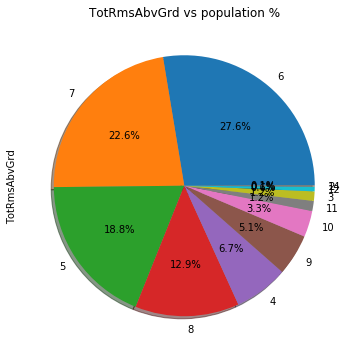

<Figure size 864x864 with 0 Axes>

Fireplaces
0    686
1    647
2    108
3      4
Name: Fireplaces, dtype: int64


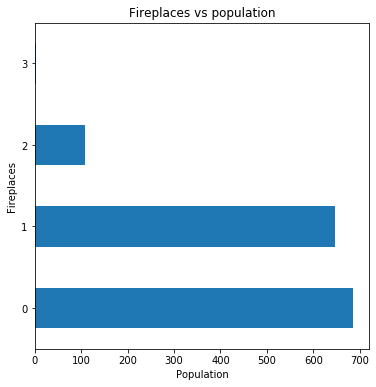

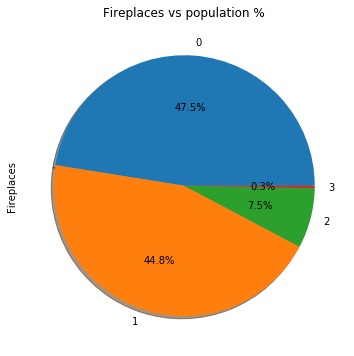

<Figure size 864x864 with 0 Axes>

GarageCars
2    814
1    366
3    181
0     79
4      5
Name: GarageCars, dtype: int64


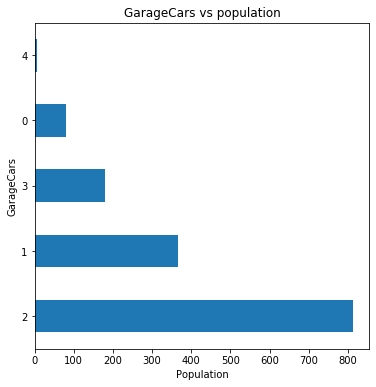

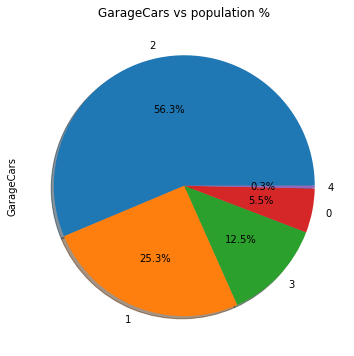

<Figure size 864x864 with 0 Axes>

MiscVal
0       1403
400       11
500        7
700        4
450        4
600        4
480        2
1200       2
350        1
800        1
1300       1
54         1
620        1
560        1
1400       1
1150       1
Name: MiscVal, dtype: int64


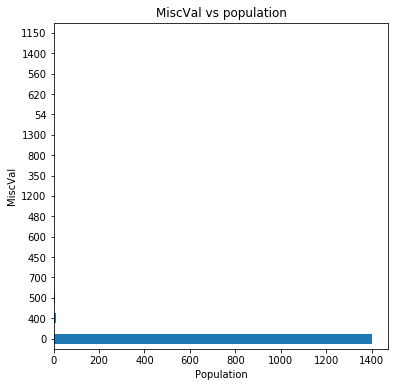

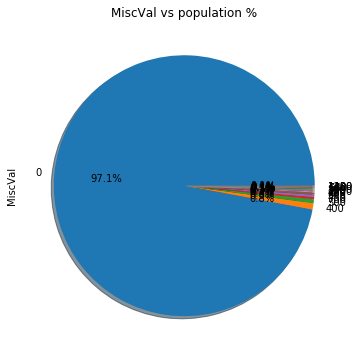

<Figure size 864x864 with 0 Axes>

YrSold_Age
1    334
3    324
4    313
2    302
0    172
Name: YrSold_Age, dtype: int64


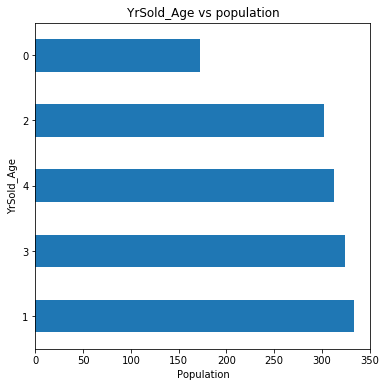

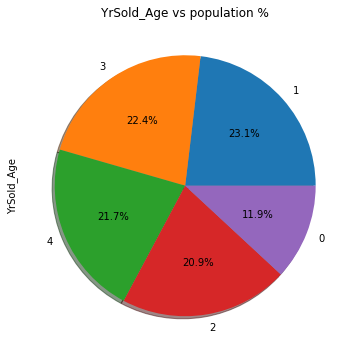

<Figure size 864x864 with 0 Axes>

In [22]:
def catcol(columns):
    cat = []
    con = []
    for i in columns:
        if data[i].nunique() < 18:
            cat.append(i)
        else:
            con.append(i)
    return cat,con


cat,con =  catcol(integer_columns)
print("The Categorical Variables are {}".format(cat))
for i in cat:
    uni_cat(i,6,6)


 Variable : LotArea 

Summary : 

count     1445.000000
mean     10046.321799
std       5479.245513
min       1300.000000
25%       7500.000000
50%       9452.000000
75%      11512.000000
95%      17015.400000
max      70761.000000
Name: LotArea, dtype: float64



 Q3  Percentile Value : 11512.0 and Q1 Value : 1300.0 and IQR Value : 10212.0



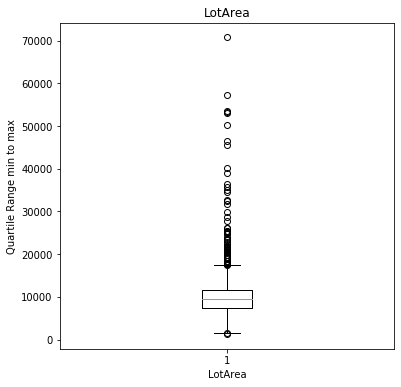

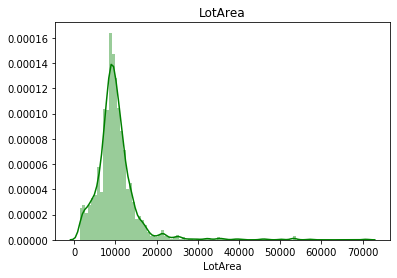


 Variable : BsmtFinSF1 

Summary : 

count    1445.000000
mean      437.647059
std       434.231435
min         0.000000
25%         0.000000
50%       380.000000
75%       706.000000
95%      1268.200000
max      2260.000000
Name: BsmtFinSF1, dtype: float64



 Q3  Percentile Value : 706.0 and Q1 Value : 0.0 and IQR Value : 706.0



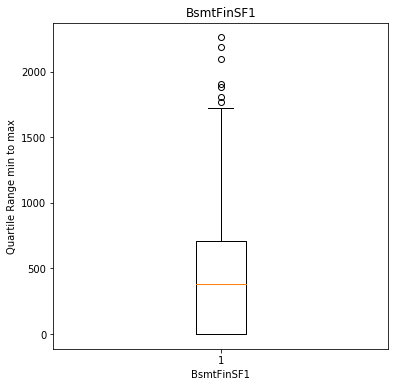

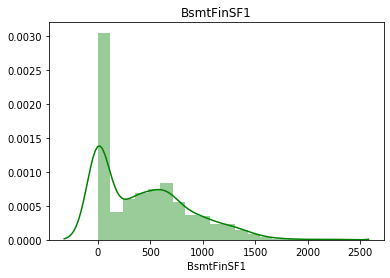


 Variable : BsmtFinSF2 

Summary : 

count    1445.000000
mean       45.768166
std       160.320613
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       391.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64



 Q3  Percentile Value : 0.0 and Q1 Value : 0.0 and IQR Value : 0.0



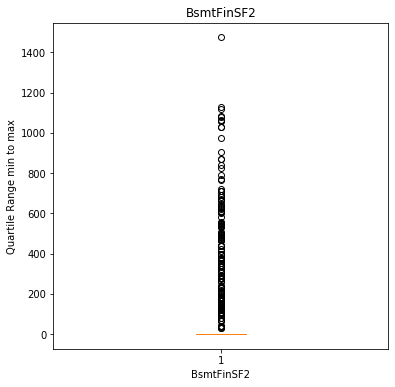

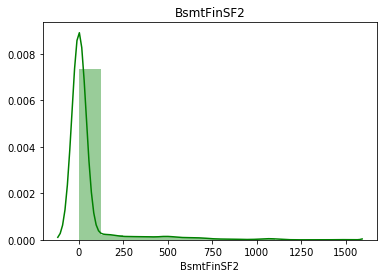


 Variable : BsmtUnfSF 

Summary : 

count    1445.000000
mean      568.672664
std       442.217870
min         0.000000
25%       225.000000
50%       481.000000
75%       810.000000
95%      1468.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64



 Q3  Percentile Value : 810.0 and Q1 Value : 0.0 and IQR Value : 810.0



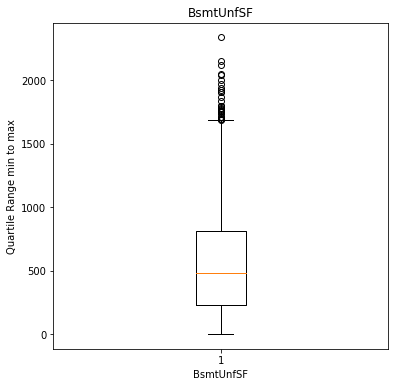

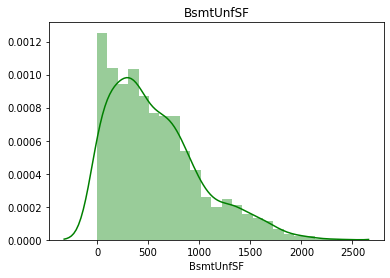


 Variable : TotalBsmtSF 

Summary : 

count    1445.000000
mean     1052.087889
std       417.303501
min         0.000000
25%       795.000000
50%       990.000000
75%      1288.000000
95%      1750.800000
max      3206.000000
Name: TotalBsmtSF, dtype: float64



 Q3  Percentile Value : 1288.0 and Q1 Value : 0.0 and IQR Value : 1288.0



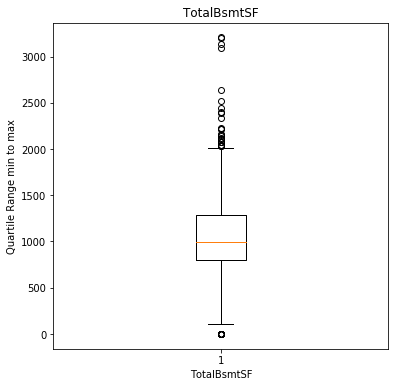

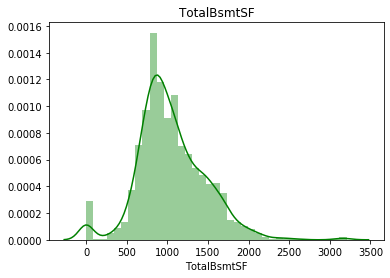


 Variable : 1stFlrSF 

Summary : 

count    1445.000000
mean     1158.665052
std       374.728725
min       334.000000
25%       882.000000
50%      1085.000000
75%      1383.000000
95%      1827.600000
max      3228.000000
Name: 1stFlrSF, dtype: float64



 Q3  Percentile Value : 1383.0 and Q1 Value : 334.0 and IQR Value : 1049.0



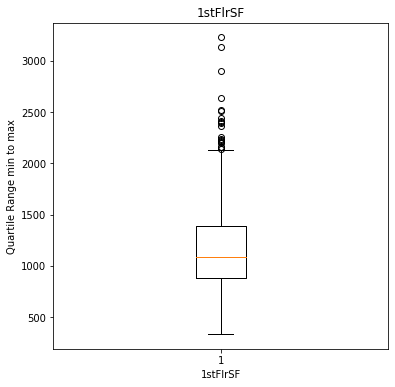

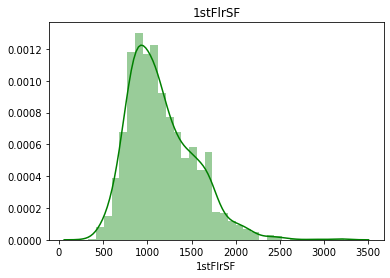


 Variable : 2ndFlrSF 

Summary : 

count    1445.000000
mean      346.032526
std       435.554532
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
95%      1138.800000
max      2065.000000
Name: 2ndFlrSF, dtype: float64



 Q3  Percentile Value : 728.0 and Q1 Value : 0.0 and IQR Value : 728.0



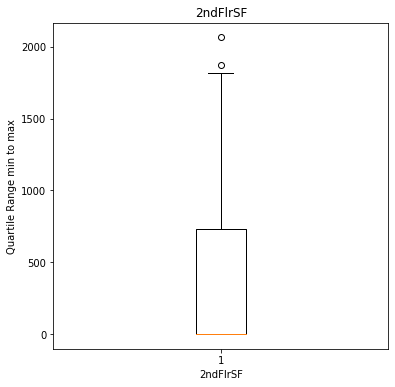

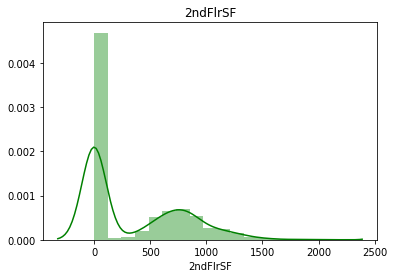


 Variable : LowQualFinSF 

Summary : 

count    1445.000000
mean        5.905190
std        48.871305
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64



 Q3  Percentile Value : 0.0 and Q1 Value : 0.0 and IQR Value : 0.0



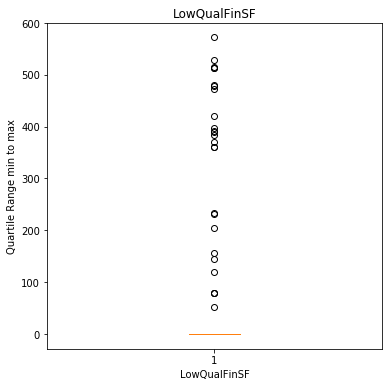

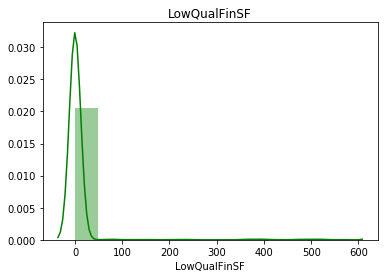


 Variable : GrLivArea 

Summary : 

count    1445.000000
mean     1510.602768
std       513.321062
min       334.000000
25%      1128.000000
50%      1459.000000
75%      1774.000000
95%      2452.000000
max      4676.000000
Name: GrLivArea, dtype: float64



 Q3  Percentile Value : 1774.0 and Q1 Value : 334.0 and IQR Value : 1440.0



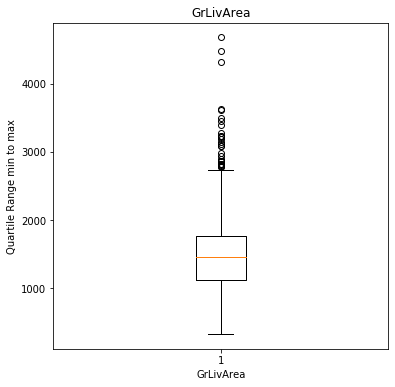

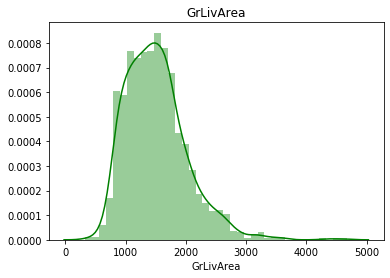


 Variable : GarageArea 

Summary : 

count    1445.000000
mean      472.811073
std       212.302154
min         0.000000
25%       336.000000
50%       479.000000
75%       576.000000
95%       849.200000
max      1390.000000
Name: GarageArea, dtype: float64



 Q3  Percentile Value : 576.0 and Q1 Value : 0.0 and IQR Value : 576.0



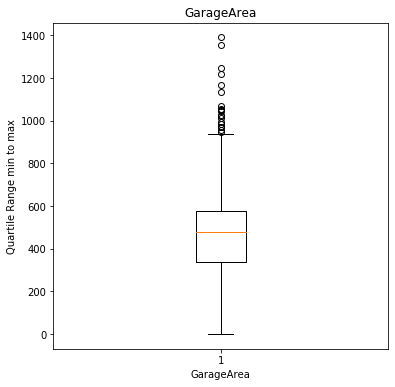

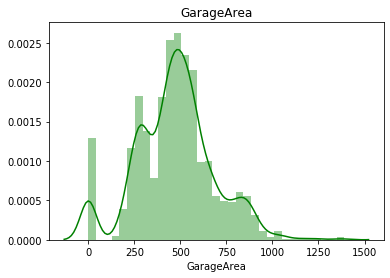


 Variable : WoodDeckSF 

Summary : 

count    1445.000000
mean       93.808997
std       124.430279
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
95%       332.000000
max       857.000000
Name: WoodDeckSF, dtype: float64



 Q3  Percentile Value : 168.0 and Q1 Value : 0.0 and IQR Value : 168.0



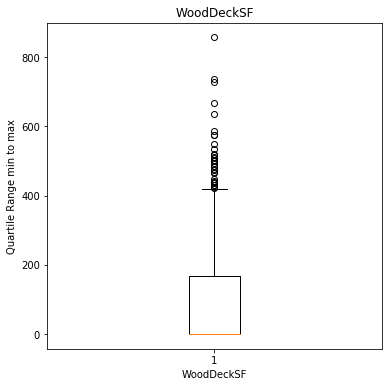

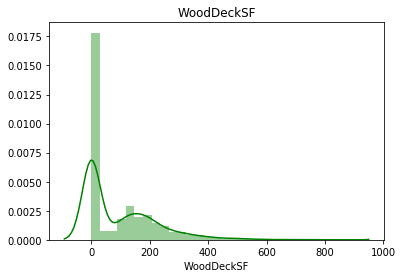


 Variable : OpenPorchSF 

Summary : 

count    1445.000000
mean       46.653287
std        66.165218
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
95%       174.800000
max       547.000000
Name: OpenPorchSF, dtype: float64



 Q3  Percentile Value : 68.0 and Q1 Value : 0.0 and IQR Value : 68.0



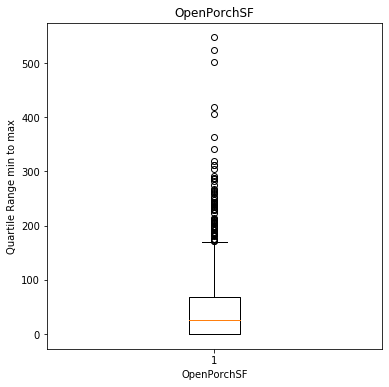

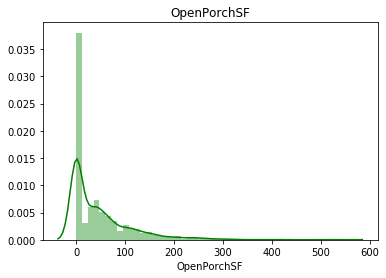


 Variable : EnclosedPorch 

Summary : 

count    1445.000000
mean       22.081661
std        61.312155
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       182.400000
max       552.000000
Name: EnclosedPorch, dtype: float64



 Q3  Percentile Value : 0.0 and Q1 Value : 0.0 and IQR Value : 0.0



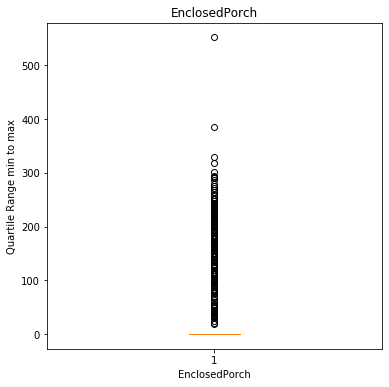

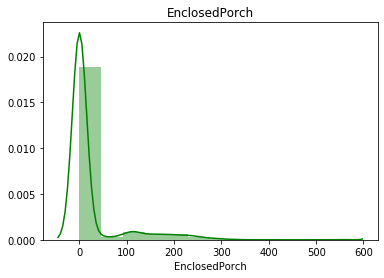


 Variable : 3SsnPorch 

Summary : 

count    1445.000000
mean        3.093426
std        26.303950
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%         0.000000
max       407.000000
Name: 3SsnPorch, dtype: float64



 Q3  Percentile Value : 0.0 and Q1 Value : 0.0 and IQR Value : 0.0



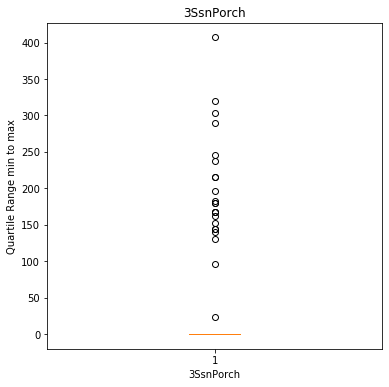

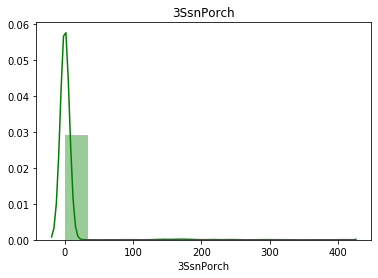


 Variable : ScreenPorch 

Summary : 

count    1445.000000
mean       14.796540
std        54.752377
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
95%       159.200000
max       480.000000
Name: ScreenPorch, dtype: float64



 Q3  Percentile Value : 0.0 and Q1 Value : 0.0 and IQR Value : 0.0



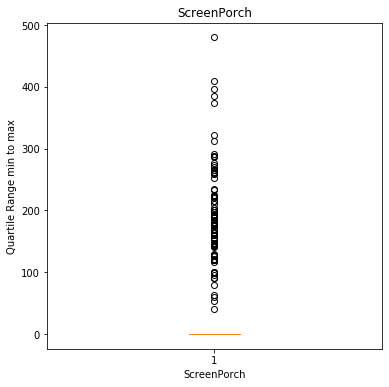

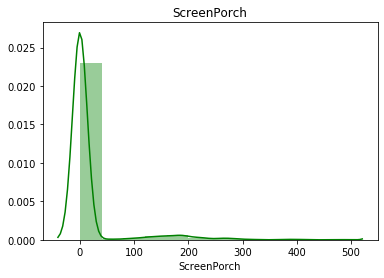


 Variable : SalePrice 

Summary : 

count      1445.000000
mean     180601.865744
std       79396.265797
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213500.000000
95%      325924.800000
max      755000.000000
Name: SalePrice, dtype: float64



 Q3  Percentile Value : 213500.0 and Q1 Value : 34900.0 and IQR Value : 178600.0



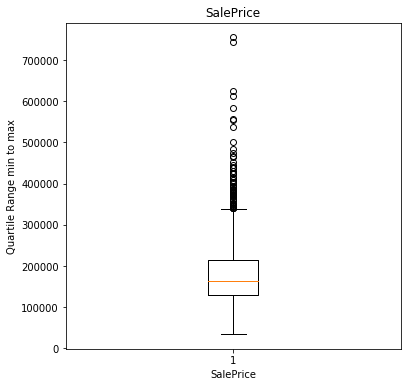

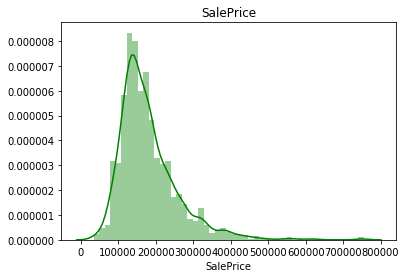


 Variable : YearBuilt_Age 

Summary : 

count    1445.000000
mean       38.705882
std        30.281505
min         0.000000
25%         9.000000
50%        37.000000
75%        56.000000
95%        94.000000
max       138.000000
Name: YearBuilt_Age, dtype: float64



 Q3  Percentile Value : 56.0 and Q1 Value : 0.0 and IQR Value : 56.0



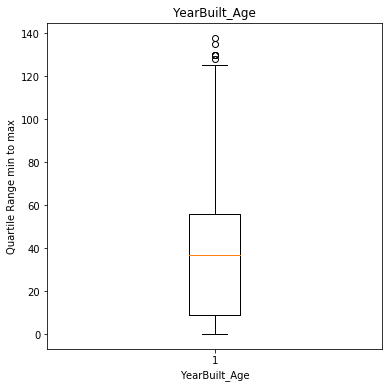

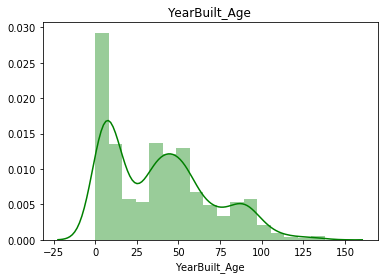


 Variable : YearRemodAdd_Age 

Summary : 

count    1445.000000
mean       25.181315
std        20.668477
min         0.000000
25%         6.000000
50%        16.000000
75%        43.000000
95%        60.000000
max        60.000000
Name: YearRemodAdd_Age, dtype: float64



 Q3  Percentile Value : 43.0 and Q1 Value : 0.0 and IQR Value : 43.0



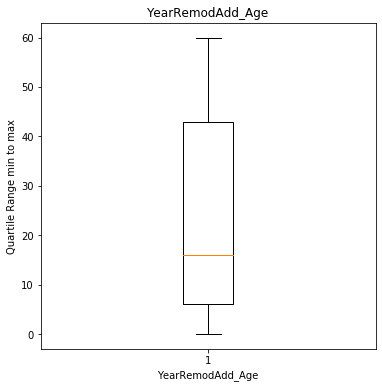

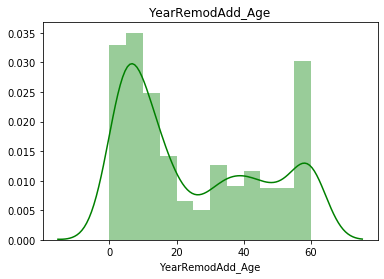

In [23]:
for i in con:
    uni_con(i)

#### From Univariate we imply
-Lot of data is left Skewed so Log transformation will be helpful <br>
-Many categorical data needs to be removed as they have more then 95 percent of one value construct 

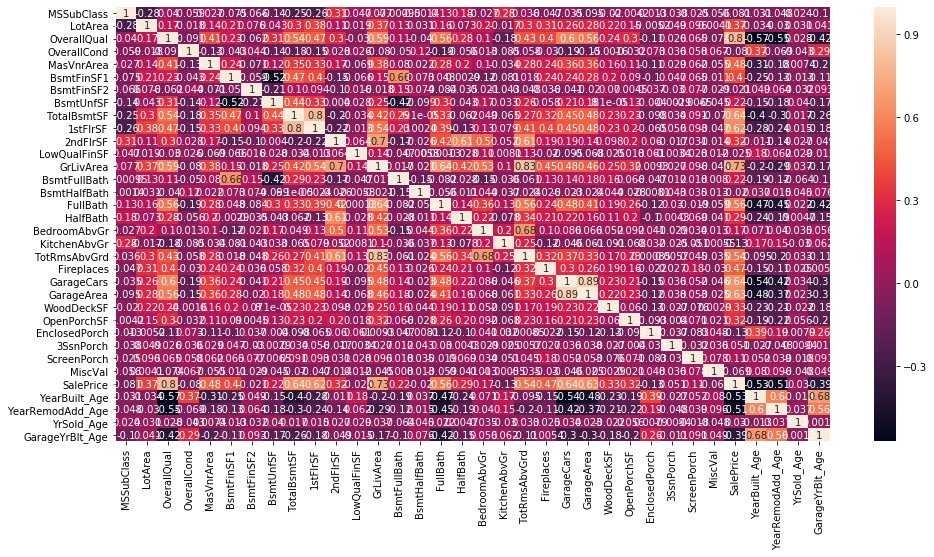

In [24]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()


In [25]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()

In [26]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.795331
GrLivArea       0.726392
GarageCars      0.643755
TotalBsmtSF     0.642184
GarageArea      0.631289
1stFlrSF        0.622182
FullBath        0.562476
TotRmsAbvGrd    0.540885
Name: SalePrice, dtype: float64


In [27]:
data.shape

(1445, 70)

## Step-4 Feature Engineering

In [28]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
data['LandSlope'] = data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
data['ExterQual'] = data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data.CentralAir.map({'N':0,'Y':1})
data['KitchenQual'] = data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['ExterCond'] = data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['LotShape'] = data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [29]:
# AS ALL R 90 Percent a particular Values
data.drop(['BsmtHalfBath','KitchenAbvGr','MiscVal'], axis=1, inplace = True)
data.drop(['LandSlope','Condition2','RoofMatl','Heating','GarageQual','GarageCond'], axis=1, inplace = True)

In [30]:
data.shape

(1445, 61)

In [31]:
#Condition2,'RoofMatl','Heating'
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st', 'Exterior2nd','MasVnrType','Foundation'
             ,'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummies = pd.get_dummies(data[dummy_col_names], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dummy_col_names, axis = 1, inplace = True)

In [32]:
data.shape

(1445, 169)

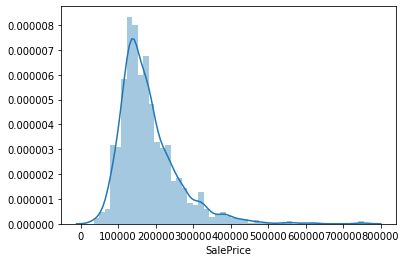

In [33]:
sns.distplot(data.SalePrice)

In [34]:
data['SalePrice'] = np.log1p(data['SalePrice'])

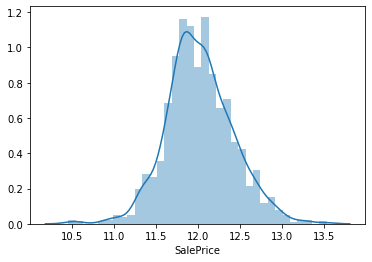

In [35]:
sns.distplot(data.SalePrice)

## Step-5 Model Building

In [36]:
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42)

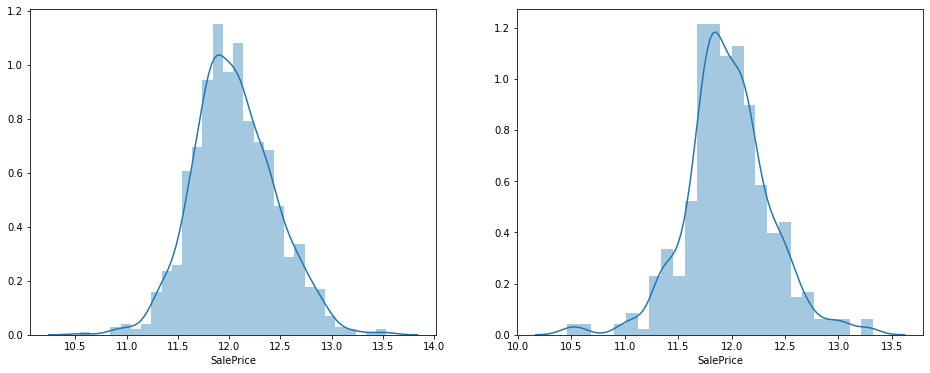

In [37]:
# Both Train and Test Target Var is Normal.
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [38]:
#'KitchenAbvGr','MiscVal','BsmtHalfBath'
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF',
              'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','SalePrice']
scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [39]:
df_train.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
998,-0.635670,-0.096715,3,-2.300598,-1.398243,-0.588015,2,2,3,2,...,0,0,0,0,1,0,0,0,1,0
1206,-0.878460,-0.247950,3,-1.575339,-1.398243,-0.588015,2,2,3,3,...,0,0,0,0,1,0,0,0,1,0
867,-0.878460,-0.577390,3,-1.575339,-0.492654,-0.588015,2,2,3,3,...,0,0,0,0,1,0,0,0,1,0
578,2.520588,-1.151948,3,0.600437,-0.492654,-0.588015,3,2,4,3,...,0,0,0,0,1,0,0,0,0,0
96,-0.878460,-0.015123,0,0.600437,-0.492654,0.414833,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


In [40]:
y_train = df_train.SalePrice
X_train = df_train.drop("SalePrice", axis = 1)
X_train.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)

In [41]:
X_train.head()

,MSSubClass,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
998,-0.635670,-0.096715,3,-2.300598,-1.398243,-0.588015,2,2,3,2,...,0,0,0,0,1,0,0,0,1,0
1206,-0.878460,-0.247950,3,-1.575339,-1.398243,-0.588015,2,2,3,3,...,0,0,0,0,1,0,0,0,1,0
867,-0.878460,-0.577390,3,-1.575339,-0.492654,-0.588015,2,2,3,3,...,0,0,0,0,1,0,0,0,1,0
578,2.520588,-1.151948,3,0.600437,-0.492654,-0.588015,3,2,4,3,...,0,0,0,0,1,0,0,0,0,0
96,-0.878460,-0.015123,0,0.600437,-0.492654,0.414833,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)


LinearRegression()

In [43]:
y_test = df_test.SalePrice
X_test = df_test.drop("SalePrice", axis = 1)
X_test.columns

Index(['MSSubClass', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)

In [44]:
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
rfe_scores

,0,1,2
0,MSSubClass,False,16
1,LotArea,False,11
2,LotShape,False,108
3,OverallQual,True,1
4,OverallCond,True,1
...,...,...,...
163,SaleCondition_AdjLand,False,26
164,SaleCondition_Alloca,False,84
165,SaleCondition_Family,False,55
166,SaleCondition_Normal,True,1


In [45]:
X_train = X_train[col]
X_test = X_test[col]
X_train.shape

(1011, 50)

In [46]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.906923271827137
0.9015351284544715
94.10057218276455
43.32302804528862
0.09307672817286305
0.099822645265642


In [47]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
print(model_cv.best_params_)

{'alpha': 5.0}


In [50]:
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    
    # Plotting the ridge regression model for each lambda
    #Computing the r2 score
    print("ALPHA =" + str(i))
    print("r2 score train = " + str(r2_score(y_train, y_pred_train))) 
    print("r2 score test = " + str(r2_score(y_test, y_pred_test)))
    print("#################################")

ALPHA =0.0001
r2 score train = 0.9069232718123624
r2 score test = 0.9015347722840996
#################################
ALPHA =0.001
r2 score train = 0.906923270351953
r2 score test = 0.9015315697950773
#################################
ALPHA =0.01
r2 score train = 0.906923126544285
r2 score test = 0.9014998440164612
#################################
ALPHA =0.05
r2 score train = 0.9069198709151571
r2 score test = 0.9013651775751382
#################################
ALPHA =0.1
r2 score train = 0.906910685805925
r2 score test = 0.9012103515413734
#################################
ALPHA =0.2
r2 score train = 0.9068796262809282
r2 score test = 0.9009398134969029
#################################
ALPHA =0.3
r2 score train = 0.9068369284391339
r2 score test = 0.9007127722033952
#################################
ALPHA =0.4
r2 score train = 0.9067867535080281
r2 score test = 0.9005208932395029
#################################
ALPHA =0.5
r2 score train = 0.9067317462454195
r2 score test = 0.900

In [51]:
# AT 3 we dont see a huge drop in model accuary in train as well as less diff between train 
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.904422327728577
0.899283825708676
96.62902666640863
44.31356660450904
0.09557767227142298
0.10210499217628811


In [52]:
lambdas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ] # Higher the value of lambda, 
                                                  # more the regularization
for i in lambdas: # for each lambda we get different model coefficients
    degree = 5 # Degree for polynomial regression - chose 5 since this is the lowest number that gave a perfect fit
    # Creating degree 5 features
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)
    
    # Plotting the ridge regression model for each lambda
    #Computing the r2 score
    print("ALPHA =" + str(i))
    print("r2 score train = " + str(r2_score(y_train, y_pred_train))) 
    print("r2 score test = " + str(r2_score(y_test, y_pred_test)))
    print("#################################")

ALPHA =0.0001
r2 score train = 0.9068097698779256
r2 score test = 0.9001150769066082
#################################
ALPHA =0.001
r2 score train = 0.9033078130022447
r2 score test = 0.9005672324825225
#################################
ALPHA =0.01
r2 score train = 0.8797436330395052
r2 score test = 0.8832204684386371
#################################
ALPHA =0.05
r2 score train = 0.8421557727083524
r2 score test = 0.8411596989550112
#################################
ALPHA =0.1
r2 score train = 0.8101720238537701
r2 score test = 0.8077722010718781
#################################
ALPHA =0.2
r2 score train = 0.7492938314278761
r2 score test = 0.74037450330742
#################################
ALPHA =0.3
r2 score train = 0.6696414754107499
r2 score test = 0.6531546628307987
#################################
ALPHA =0.4
r2 score train = 0.5641640949322984
r2 score test = 0.5415712929794836
#################################
ALPHA =0.5
r2 score train = 0.4400940239943102
r2 score test = 0.41

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [55]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [56]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9033078130022447
0.9005672324825225
97.75580105473057
43.74888737643373
0.09669218699775527
0.10080388796413302


In [57]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }


rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,0.904422,0.903308
1,0.899284,0.900567
2,96.629027,97.755801
3,44.313567,43.748887
4,0.309156,0.310954
5,0.319539,0.317496


In [58]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
a = list(zip(col,model_parameter))

In [59]:
feature_ridge_df = pd.DataFrame(columns=['feature','CoeffValue'], data=a)

In [60]:
betas = pd.DataFrame(index=X_train.columns)

In [61]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [62]:
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
SaleCondition_Partial,0.312831,0.292080,0.308542
Neighborhood_ClearCr,0.326087,0.262039,0.277021
Neighborhood_Crawfor,0.299646,0.254760,0.266211
Neighborhood_StoneBr,0.353617,0.244648,0.245699
GrLivArea,0.189053,0.174809,0.240709
OverallQual,0.193245,0.209696,0.216156
CentralAir,0.244527,0.210081,0.204799
MSZoning_RL,0.420249,0.158229,0.190327
MSZoning_FV,0.469153,0.157668,0.181018
SaleCondition_Normal,0.185347,0.173797,0.180110


In [63]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_TRAIN " +str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_TEST " +str(r2_test_lr))
metric3.append(r2_test_lr)

R2_TRAIN 0.9000403168472593
R2_TEST 0.9000594396790801


In [64]:
# AT 3 we dont see a huge drop in model accuary in train as well as less diff between train 
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_TRAIN " +str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_TEST " +str(r2_test_lr))
metric2.append(r2_test_lr)

R2_TRAIN 0.9026327064912597
R2_TEST 0.8991822770769966


In [65]:
betas = pd.DataFrame(index=X_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
GrLivArea,0.189053,0.177801,0.307381
SaleCondition_Partial,0.312831,0.262319,0.283891
OverallQual,0.193245,0.216473,0.228333
Neighborhood_Crawfor,0.299646,0.221833,0.226269
Neighborhood_ClearCr,0.326087,0.217229,0.223330
CentralAir,0.244527,0.189615,0.189311
SaleCondition_Normal,0.185347,0.153715,0.157997
Foundation_PConc,0.150338,0.152082,0.155388
MSZoning_RL,0.420249,0.133091,0.147575
Neighborhood_StoneBr,0.353617,0.187479,0.145819
